Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on '₹42' in 'mbcsToSbcs': for ₹ (U+20B9)"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on '₹41' in 'mbcsToSbcs': for ₹ (U+20B9)"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on '₹40' in 'mbcsToSbcs': for ₹ (U+20B9)"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on '₹39' in 'mbcsToSbcs': for ₹ (U+20B9)"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on '₹39' in 'mbcsToSbcs': for ₹ (U+20B9)"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on '₹638' in 'mbcsToSbcs': for ₹ (U+20B9)"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Intrinsi

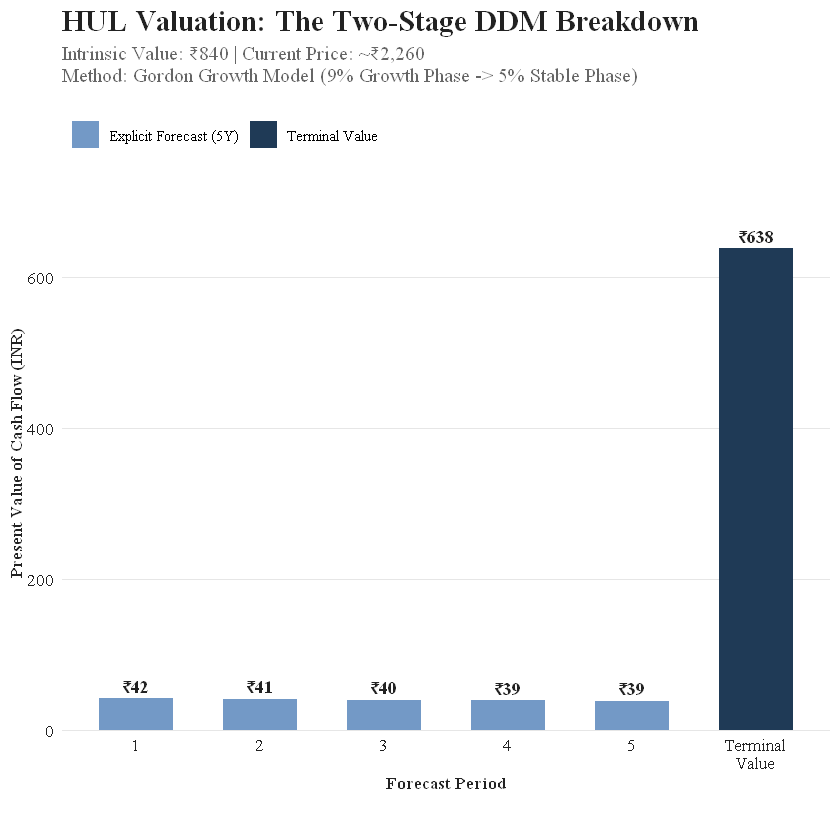

In [8]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(grid)

# ==========================================
# 1. GS DESIGN THEME SETUP
# ==========================================
# Goldman Sachs Style Colors
gs_navy       <- "#1F3A56"  # Deep Navy for primary emphasis (Terminal Value)
gs_lightblue  <- "#7399C6"  # Softer Blue for secondary data (Stage 1)
gs_grey       <- "#E6E6E6"  # Very light grey for backgrounds/grids
gs_text_dark  <- "#222222"  # Almost black for text
gs_text_light <- "#666666"  # Dark grey for subtitles/captions

# Custom Theme Function
theme_gs <- function() {
  theme_minimal(base_family = "serif") +  # Serif fonts look more "Financial Report"
    theme(
      # Backgrounds
      plot.background = element_rect(fill = "white", color = NA),
      panel.background = element_rect(fill = "white", color = NA),
      
      # Grid lines (Minimalist: only horizontal)
      panel.grid.major.y = element_line(color = gs_grey, size = 0.5),
      panel.grid.minor.y = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      
      # Text Styling
      plot.title = element_text(face = "bold", size = 18, color = gs_text_dark, hjust = 0),
      plot.subtitle = element_text(size = 12, color = gs_text_light, margin = margin(b = 15), hjust = 0),
      plot.caption = element_text(size = 9, color = gs_text_light, hjust = 0, margin = margin(t = 15)),
      axis.title = element_text(face = "bold", size = 10, color = gs_text_dark),
      axis.text = element_text(size = 10, color = gs_text_dark),
      
      # Legend
      legend.position = "top",
      legend.justification = "left",
      legend.title = element_blank()
    )
}

# ==========================================
# 2. RUN THE DDM MODEL (Same Logic)
# ==========================================
calculate_2stage_ddm <- function(D0, Ke, g1, g2, stage1_years) {
  years <- 1:stage1_years
  dividends <- D0 * (1 + g1)^years
  pvs <- dividends / (1 + Ke)^years
  
  # Terminal Value
  D_terminal <- dividends[stage1_years] * (1 + g2)
  tv_nominal <- D_terminal / (Ke - g2)
  tv_present_value <- tv_nominal / (1 + Ke)^stage1_years
  
  total_value <- sum(pvs) + tv_present_value
  
  df_flows <- data.frame(
    Year = factor(c(years, "Terminal\nValue"), levels = c(years, "Terminal\nValue")),
    Type = c(rep("Explicit Forecast (5Y)", stage1_years), "Terminal Value"),
    Present_Value = c(pvs, tv_present_value)
  )
  
  return(list(value = total_value, data = df_flows))
}

# Inputs
model_output <- calculate_2stage_ddm(D0=43, Ke=0.1136, g1=0.09, g2=0.05, stage1_years=5)

# ==========================================
# 3. GENERATE & SAVE THE PLOT
# ==========================================
p1 <- ggplot(model_output$data, aes(x = Year, y = Present_Value, fill = Type)) +
  # Bars
  geom_bar(stat = "identity", width = 0.6) +
  
  # Data Labels (on top of bars)
  geom_text(aes(label = paste0("₹", round(Present_Value, 0))), 
            vjust = -0.5, family = "serif", fontface = "bold", color = gs_text_dark) +
  
  # Colors
  scale_fill_manual(values = c("Explicit Forecast (5Y)" = gs_lightblue, 
                               "Terminal Value" = gs_navy)) +
  
  # Scales
  scale_y_continuous(labels = scales::comma, expand = expansion(mult = c(0, 0.15))) +
  
  # Titles & Labels
  labs(
    title = "HUL Valuation: The Two-Stage DDM Breakdown",
    subtitle = paste0("Intrinsic Value: ₹", round(model_output$value, 0), " | Current Price: ~₹2,260\n",
                      "Method: Gordon Growth Model (9% Growth Phase -> 5% Stable Phase)"),
    x = "Forecast Period",
    y = "Present Value of Cash Flow (INR)",
    caption = ""
  ) +
  
  # Apply GS Theme
  theme_gs()

# Print Plot
print(p1)

# ==========================================
# 4. SAVE TO DEVICE
# ==========================================
# This saves the plot to your current working directory
ggsave("HUL_Valuation_GS_Style.png", plot = p1, width = 10, height = 6, dpi = 300)
ggsave("HUL_Valuation_GS_Style.pdf", plot = p1, width = 10, height = 6) # PDF version

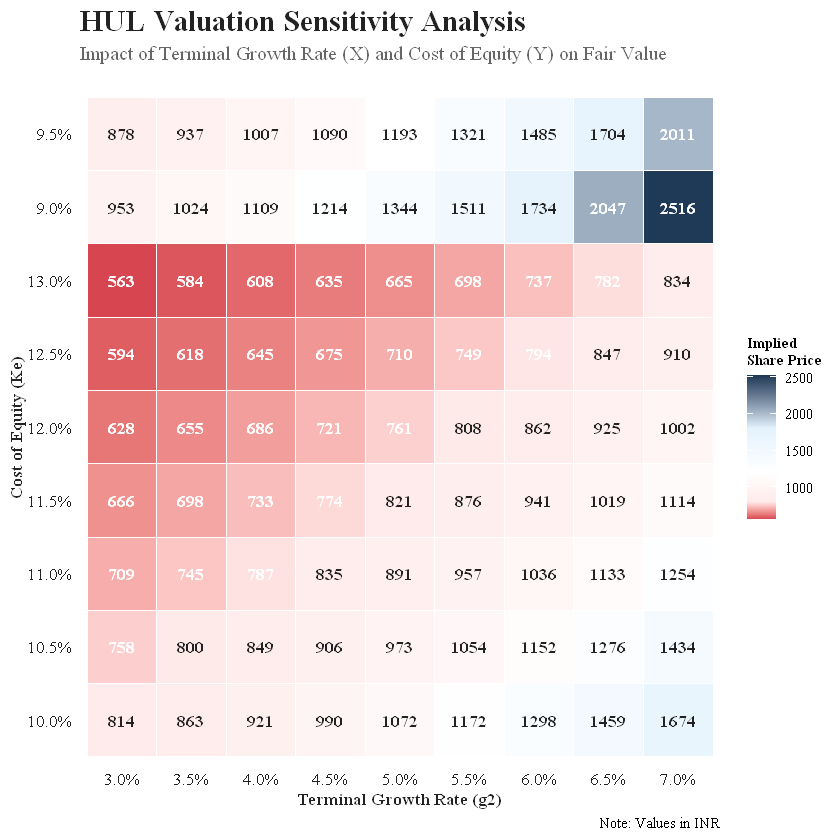

In [6]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(scales)

# ==========================================
# 1. GS DESIGN THEME
# ==========================================
gs_navy       <- "#1F3A56"  
gs_grey       <- "#E6E6E6"  
gs_text_dark  <- "#222222"  

theme_gs <- function() {
  theme_minimal(base_family = "serif") +
    theme(
      plot.background = element_rect(fill = "white", color = NA),
      panel.grid = element_blank(), 
      plot.title = element_text(face = "bold", size = 18, color = gs_text_dark, hjust = 0),
      plot.subtitle = element_text(size = 12, color = "#666666", margin = margin(b = 15), hjust = 0),
      axis.title = element_text(face = "bold", size = 10, color = gs_text_dark),
      axis.text = element_text(size = 10, color = gs_text_dark),
      legend.position = "right",
      legend.title = element_text(size = 9, face = "bold")
    )
}

# ==========================================
# 2. GENERATE SENSITIVITY DATA
# ==========================================
# Inputs (Same as before)
HUL_D0 <- 43.00
HUL_g1 <- 0.09
Stage1_N <- 5

# Define Ranges
ke_range <- seq(0.09, 0.13, by = 0.005)  
g2_range <- seq(0.03, 0.07, by = 0.005)  

# Create Grid
sensitivity_grid <- expand.grid(Ke = ke_range, g2 = g2_range)

# Calculate Price Function
get_price <- function(k, g) {
  years <- 1:Stage1_N
  divs <- HUL_D0 * (1 + HUL_g1)^years
  pvs <- divs / (1 + k)^years
  term_val <- (divs[Stage1_N] * (1 + g)) / (k - g)
  term_pv <- term_val / (1 + k)^Stage1_N
  return(sum(pvs) + term_pv)
}

sensitivity_grid$Price <- mapply(get_price, sensitivity_grid$Ke, sensitivity_grid$g2)

# ==========================================
# 3. PLOT THE HEATMAP (WITH FIXED TEXT COLORS)
# ==========================================

# --- Key Fix Here: Define Text Color Logic ---
# White Text only for Deep Red (<800) or Deep Navy (>1800)
# Black Text for everything in between (Light Red, White, Light Blue)
sensitivity_grid$TextColor <- ifelse(sensitivity_grid$Price < 800 | sensitivity_grid$Price > 1800, 
                                     "white", "#222222")

p2 <- ggplot(sensitivity_grid, aes(x = factor(sprintf("%.1f%%", g2 * 100)), 
                                   y = factor(sprintf("%.1f%%", Ke * 100)), 
                                   fill = Price)) +
  # Tile Layer
  geom_tile(color = "white", size = 0.5) +
  
  # Text Labels (Using the new conditional color column)
  geom_text(aes(label = round(Price, 0), color = TextColor), 
            size = 3.5, family = "serif", fontface = "bold") +
  
  # Map the text colors explicitly
  scale_color_identity() + 
  
  # Color Scheme: Red (Bear) -> White (Neutral) -> Navy (Bull)
  # Values adjusted to ensure the "Light Zone" matches our text logic
  scale_fill_gradientn(colors = c("#D64550", "#FFEAEA", "white", "#E3F2FD", "#1F3A56"),
                       values = scales::rescale(c(min(sensitivity_grid$Price), 
                                                  800,   # Start of Light Red
                                                  1200,  # Pure White
                                                  1800,  # End of Light Blue
                                                  max(sensitivity_grid$Price))),
                       name = "Implied\nShare Price") +
  
  # Titles & Labels
  labs(
    title = "HUL Valuation Sensitivity Analysis",
    subtitle = "Impact of Terminal Growth Rate (X) and Cost of Equity (Y) on Fair Value",
    x = "Terminal Growth Rate (g2)",
    y = "Cost of Equity (Ke)",
    caption = "Note: Values in INR"
  ) +
  
  theme_gs()

# Print
print(p2)

# ==========================================
# 4. SAVE TO DEVICE
# ==========================================
ggsave("HUL_Sensitivity_GS_Style_Fixed.png", plot = p2, width = 10, height = 7, dpi = 300)